In [1]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import keras




model = keras.saving.load_model("model_fire.keras")



In [2]:
def preprocess(image):
    return cv2.resize(tf.keras.applications.vgg19.preprocess_input(image), (512, 512))


def low_res(image):
    return preprocess(image)[0::12,0::12]

def preprocess_predict(image):
    return np.expand_dims(preprocess(image),axis=0)

In [3]:
class utils:
    @staticmethod
    def preprocess(image):
        return cv2.resize(image, (512, 512))

    @staticmethod
    def low_res(image):
        return utils.preprocess(image)[0::12, 0::12]

    @staticmethod
    def preprocess_predict(image):
        return np.expand_dims(utils.preprocess(tf.keras.applications.vgg19.preprocess_input(image)), axis=0)
    
    @staticmethod
    def acquire_image(path):
        return cv2.imread(path,1)

In [4]:
im = utils.acquire_image('Dataset/fire_dataset/non_fire_images/non_fire.64.png')

In [5]:
utils.low_res(im).shape, utils.preprocess(im).shape

((43, 43, 3), (512, 512, 3))

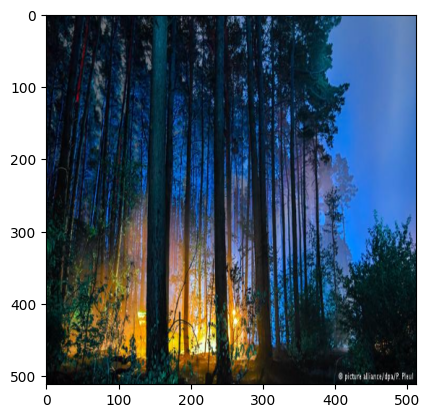

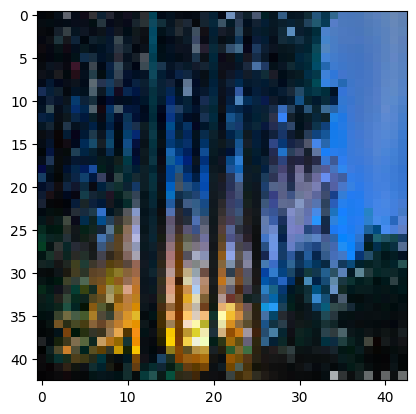

In [6]:
plt.imshow(utils.preprocess(im))
plt.show()
plt.imshow(utils.low_res(im))
plt.show()

In [ ]:
import numpy as np

prob = model.predict(utils.preprocess_predict(im))
label = int(prob.item() >= 0.5) 
print(label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1


In [15]:
import time
import datetime
class ADController:
    def __init__(self, model, cooldown=120, duration=360):
        self.CNN_model = model
        # self.SNN_model = low_res_model
        self.cooldown = cooldown
        self.last_called = 0
        self.CNN_call_history = []
        self.SNN_call_history = []
        self.duration = duration
        self.start_time = time.time()

    def start_loop(self, data):
        print("Starting Anomaly Detection loop...")
        self.start_time = time.time()
        self.last_called = time.time()
        while time.time() < (self.start_time + self.duration):
            img = cv2.imread(data.iloc[random.randrange(0,len(data))]["filepath"])
            check = self.SNN_pred(img)
            # print(f"check: {check}")
            correct_label = self.infer(utils.preprocess_predict(img), check)
            if check:
                self.SNN_update(correct_label)

    def SNN_pred(self,data):
        img = utils.low_res(data)
        time.sleep(0.01) #simulo inferenza SNN
        self.update_last_call(0)
        return 1 if np.random.exponential(scale = 0.15) > 1  else 0

    def SNN_update(self,prob):
        # print(f"label : {prob}")
        label = int(prob.item() >= 0.5)
        time.sleep(0.01) #simulo aggiornamento SNN
        # print(f"label : {label}")
        return None

    def infer(self, data, check):
        current_time = time.time()
        if check:
            self.update_last_call(1)
            print(f"Inferenza vera.")
            return self.CNN_model.predict(data,  verbose=0)
        elif current_time - self.last_called >= self.cooldown:
            self.update_last_call(1)
            print(f"Inferenza di routine.")
            return self.CNN_model.predict(data, verbose=0)

    def update_last_call(self,flag):
        current_time = time.time()
        self.update_call_history(current_time,flag)
        if flag:
            print(f"Time since last call: {current_time - self.last_called:.2f} seconds")
            self.last_called = current_time
        return None

    def update_call_history(self, time,flag):
        if flag:
            self.CNN_call_history.append(time)
        else:
            self.SNN_call_history.append(time)
        return None


In [16]:
img_df = pd.read_csv("image_data.csv")

In [17]:
controller = ADController(model,cooldown=30,duration=100)

controller.start_loop(img_df)

Starting Anomaly Detection loop...
Time since last call: 30.27 seconds
Inferenza di routine.
Time since last call: 14.35 seconds
Inferenza vera.
Time since last call: 8.68 seconds
Inferenza vera.
Time since last call: 6.69 seconds
Inferenza vera.
Time since last call: 30.06 seconds
Inferenza di routine.


In [18]:
len(controller.SNN_call_history) 

2693

In [19]:
len(controller.CNN_call_history) 

5

In [20]:
for timestamp in controller.CNN_call_history:
    print(datetime.datetime.fromtimestamp(timestamp).strftime('%c'))

Wed Mar  5 10:40:35 2025
Wed Mar  5 10:40:49 2025
Wed Mar  5 10:40:58 2025
Wed Mar  5 10:41:05 2025
Wed Mar  5 10:41:35 2025


In [21]:
for timestamp in controller.SNN_call_history:
    print(datetime.datetime.fromtimestamp(timestamp).strftime('%c'))

Wed Mar  5 10:40:05 2025
Wed Mar  5 10:40:05 2025
Wed Mar  5 10:40:05 2025
Wed Mar  5 10:40:05 2025
Wed Mar  5 10:40:05 2025
Wed Mar  5 10:40:05 2025
Wed Mar  5 10:40:05 2025
Wed Mar  5 10:40:05 2025
Wed Mar  5 10:40:05 2025
Wed Mar  5 10:40:05 2025
Wed Mar  5 10:40:05 2025
Wed Mar  5 10:40:05 2025
Wed Mar  5 10:40:05 2025
Wed Mar  5 10:40:05 2025
Wed Mar  5 10:40:05 2025
Wed Mar  5 10:40:05 2025
Wed Mar  5 10:40:05 2025
Wed Mar  5 10:40:05 2025
Wed Mar  5 10:40:05 2025
Wed Mar  5 10:40:05 2025
Wed Mar  5 10:40:05 2025
Wed Mar  5 10:40:05 2025
Wed Mar  5 10:40:05 2025
Wed Mar  5 10:40:05 2025
Wed Mar  5 10:40:05 2025
Wed Mar  5 10:40:05 2025
Wed Mar  5 10:40:05 2025
Wed Mar  5 10:40:05 2025
Wed Mar  5 10:40:05 2025
Wed Mar  5 10:40:05 2025
Wed Mar  5 10:40:06 2025
Wed Mar  5 10:40:06 2025
Wed Mar  5 10:40:06 2025
Wed Mar  5 10:40:06 2025
Wed Mar  5 10:40:06 2025
Wed Mar  5 10:40:06 2025
Wed Mar  5 10:40:06 2025
Wed Mar  5 10:40:06 2025
Wed Mar  5 10:40:06 2025
Wed Mar  5 10:40:06 2025
